In [11]:
# http://resource.data.one.gov.hk/td/carpark/basic_info_all.json
# http://resource.data.one.gov.hk/td/carpark/basic_info_tdcp1.json
# https://resource.data.one.gov.hk/td/carpark/vacancy_all.json

import json
import requests

# download the json file
url = "http://resource.data.one.gov.hk/td/carpark/basic_info_all.json"
response = requests.get(url)
data = response.json()
json.dump(data, open("carpark.json", "w", encoding="utf-8"), ensure_ascii=False, indent=4)

url = "https://resource.data.one.gov.hk/td/carpark/vacancy_all.json"
response = requests.get(url)
data = response.json()
json.dump(data, open("vacancy.json", "w", encoding="utf-8"), ensure_ascii=False, indent=4)

In [ ]:
import json
# parse the json file
carpark = json.load(open("carpark.json", "r", encoding="utf-8"))
vacancy = json.load(open("vacancy.json", "r", encoding="utf-8"))

park0 = carpark['car_park'][0]
# {'park_id': 'tdc166p1',
#  'name_en': 'Phase 1 Carpark of Tin Ching Estate',
#  'name_tc': '天晴邨第一期停車場',
#  'name_sc': '天晴邨第一期停车场',
#  'displayAddress_en': 'Tin Wah RD, Aera 103, Tin Shui Wai, N.T.',
#  'displayAddress_tc': '新界天水圍103區天華路',
#  'displayAddress_sc': '新界天水围103区天华路',
#  'latitude': 22.464178165652,
#  'longitude': 114.00256679813,
#  'district_en': 'Yuen Long',
#  'district_tc': '元朗區',
#  'district_sc': '元朗区',
#  'contactNo': '34018578',
#  'opening_status': None,
#  'height': 0,
#  'remark_en': 'Height Limit: \n',
#  'remark_tc': '高度限制: \n',
#  'remark_sc': '高度限制: \n',
#  'website_en': '',
#  'website_tc': '',
#  'website_sc': '',
#  'carpark_photo': 'http://resource.data.one.gov.hk/td/carpark/tdc166p1.jpg'}

# 将vacancy用park_id作为key 构建一个字典
vacancy_dict = {}
for v in vacancy['car_park']:
    vacancy_dict[v['park_id']] = v
    
# 在vacancy_dict中找到park0的空位信息
vacancy_dict[park0['park_id']]
# {'park_id': 'tdc166p1',
#  'vehicle_type': [{'type': 'P',
#    'service_category': [{'category': 'HOURLY',
#      'vacancy_type': 'A',
#      'vacancy': -1,
#      'lastupdate': '2024-11-13 18:42:03'}]}]}

{'park_id': 'tdc166p1',
 'vehicle_type': [{'type': 'P',
   'service_category': [{'category': 'HOURLY',
     'vacancy_type': 'A',
     'vacancy': -1,
     'lastupdate': '2024-11-13 18:42:03'}]}]}

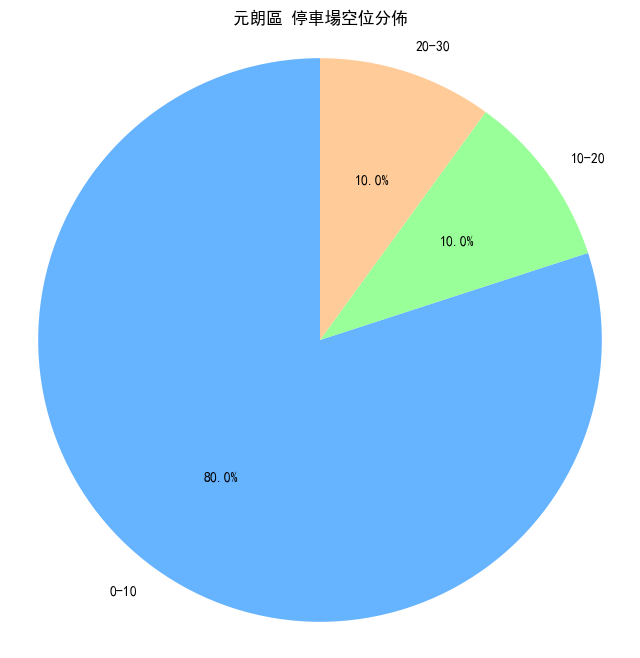

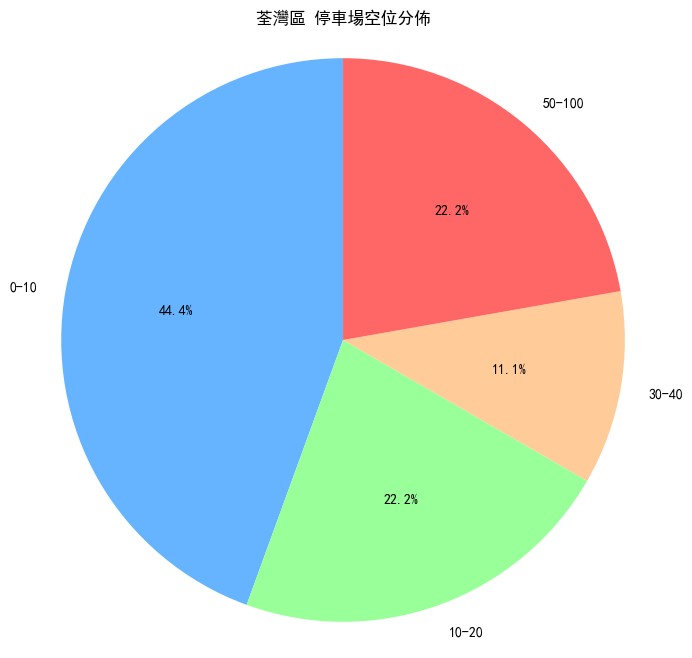

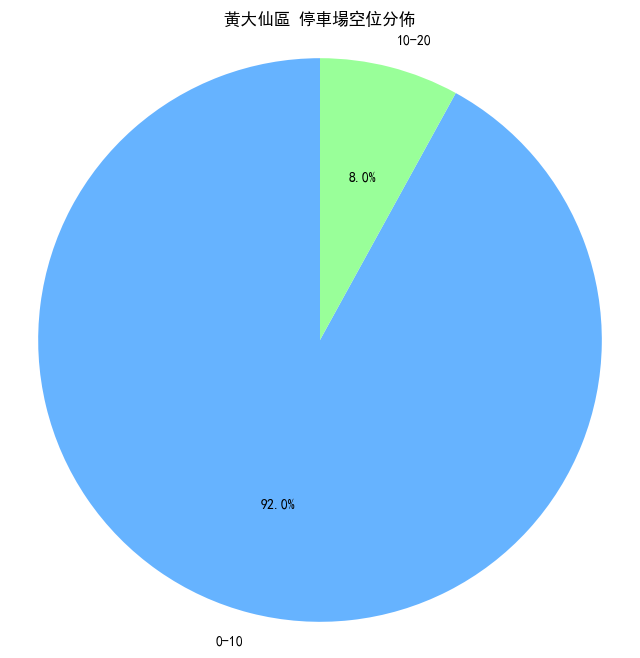

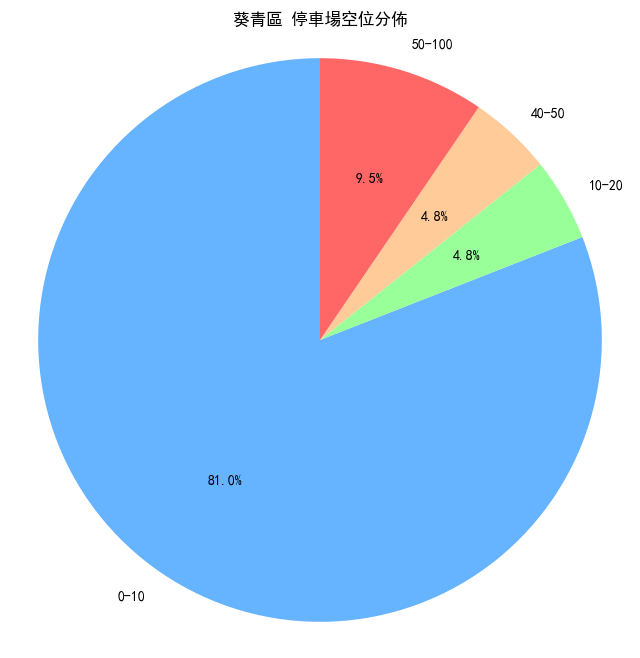

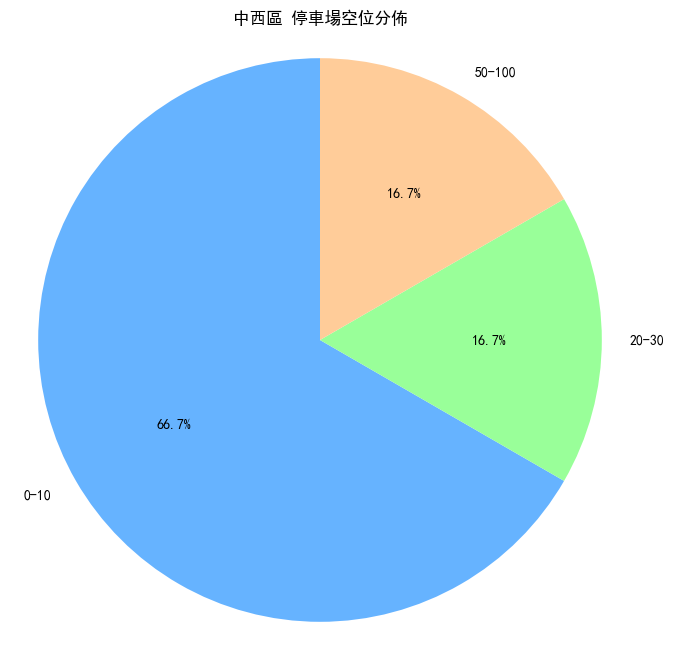

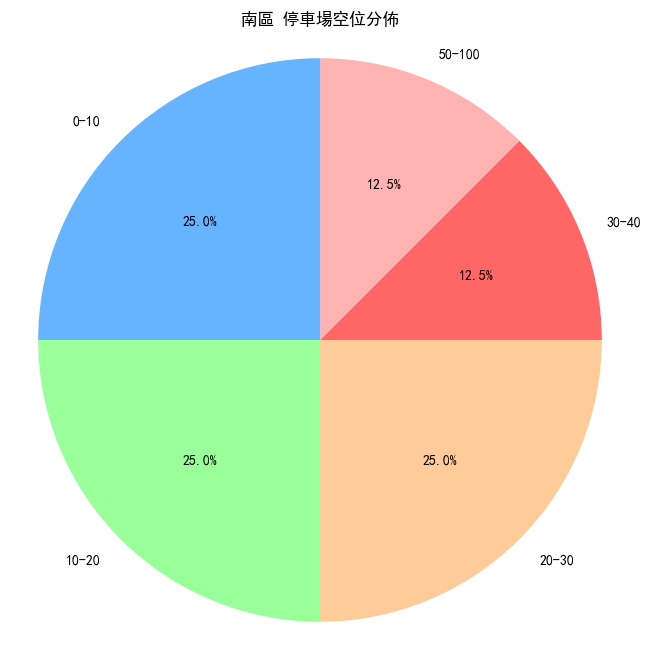

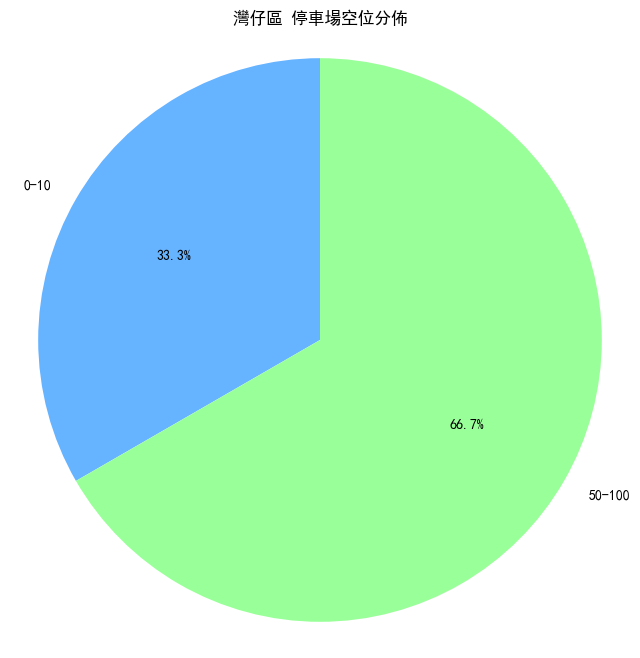

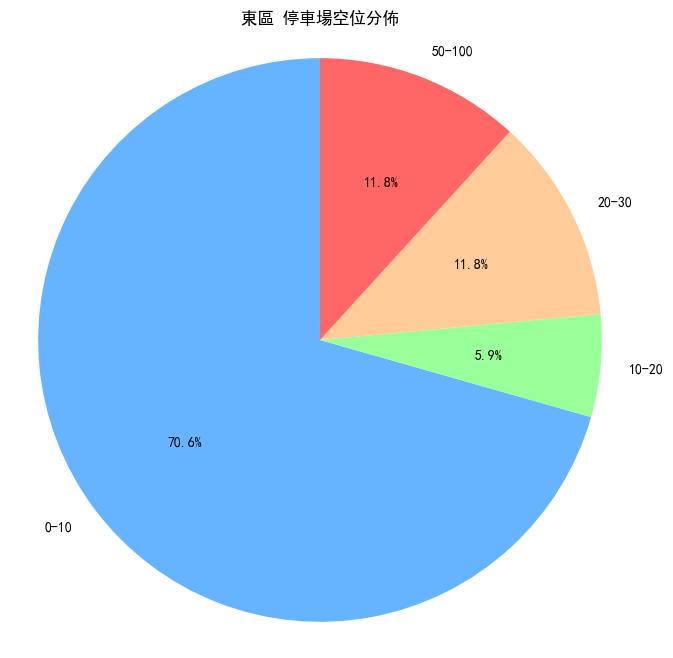

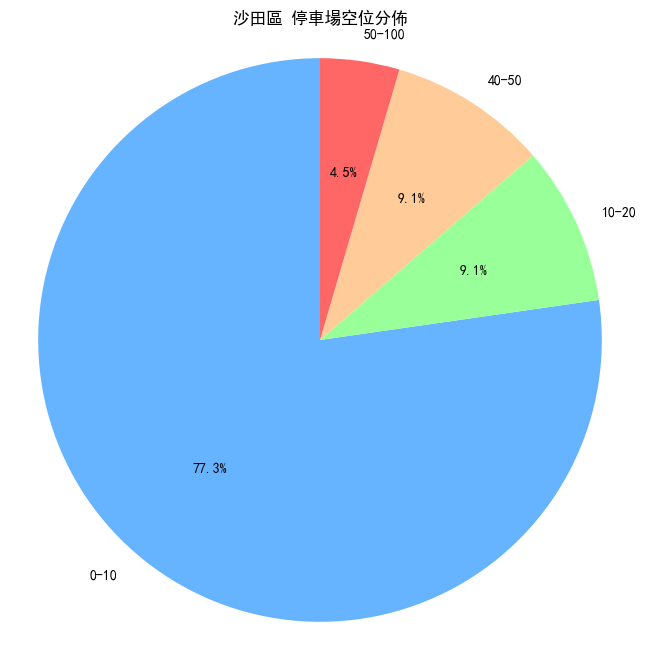

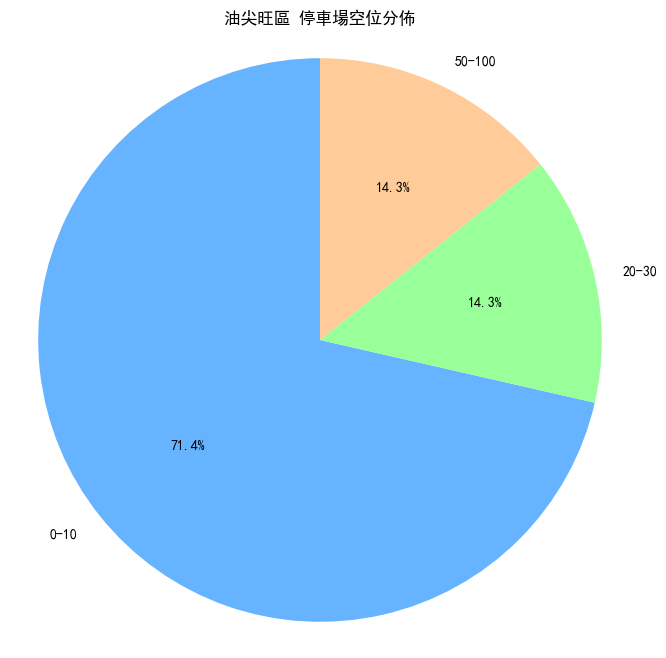

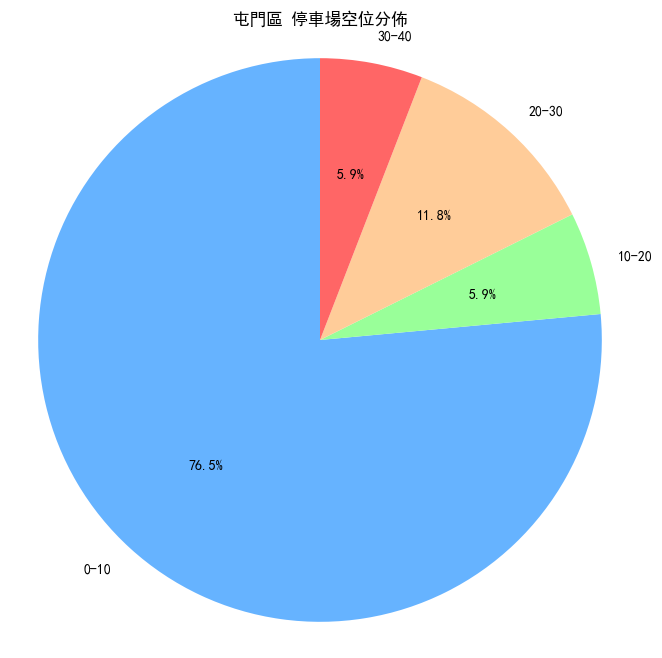

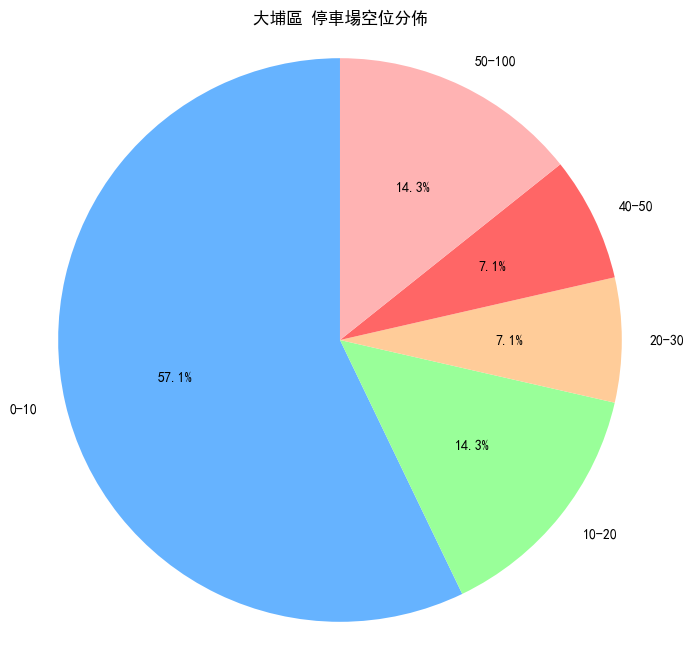

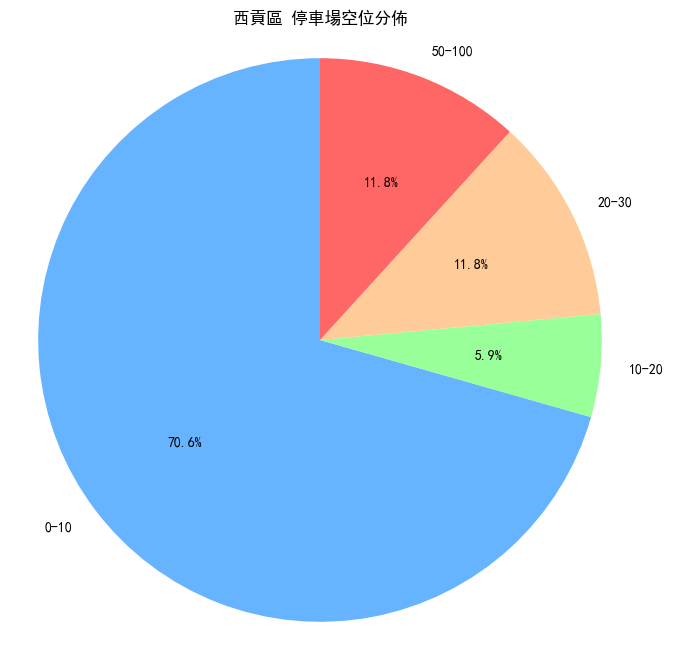

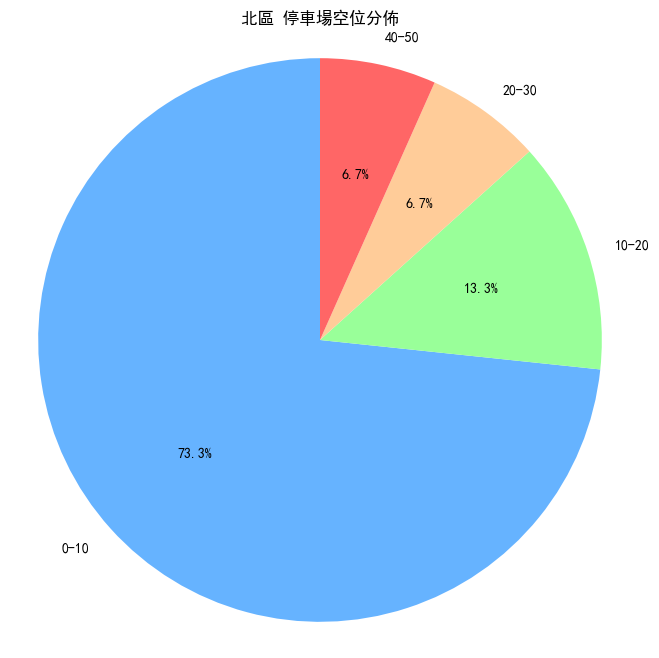

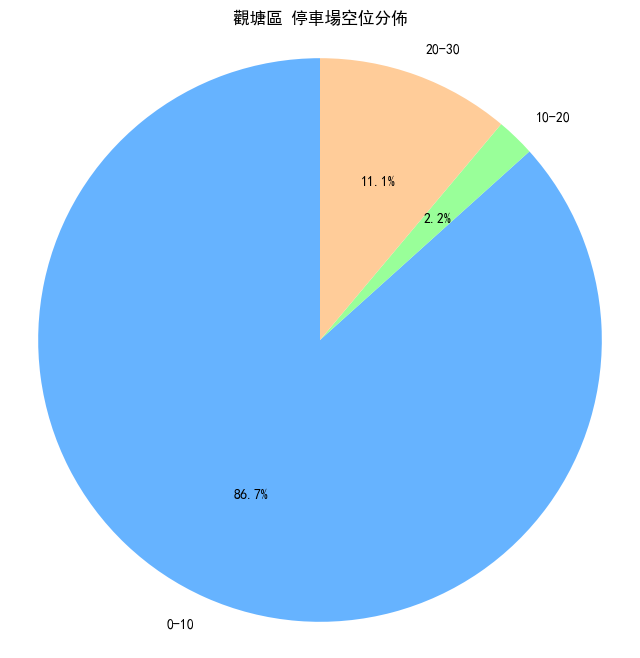

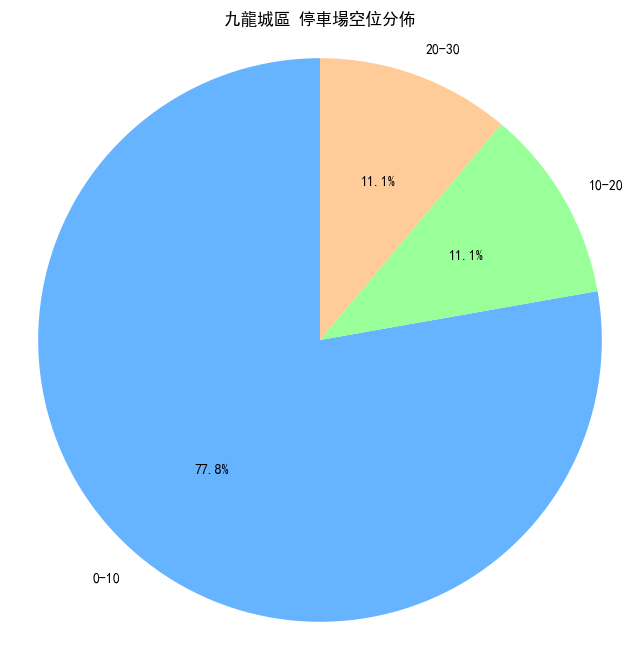

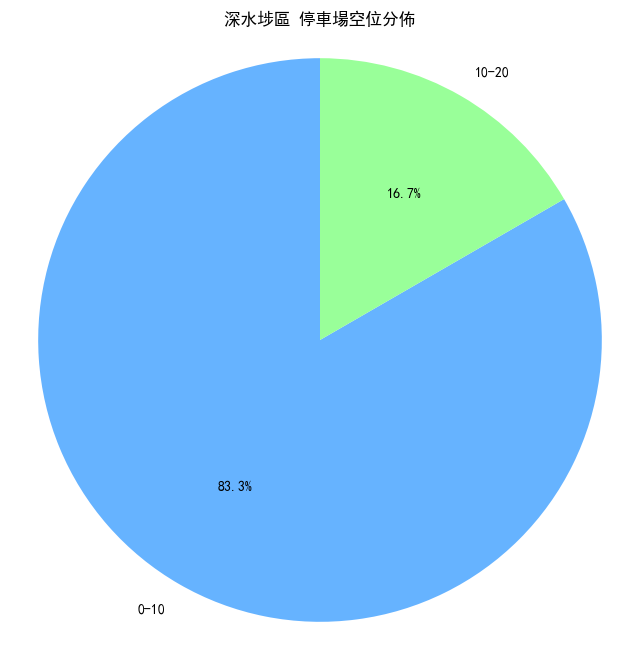

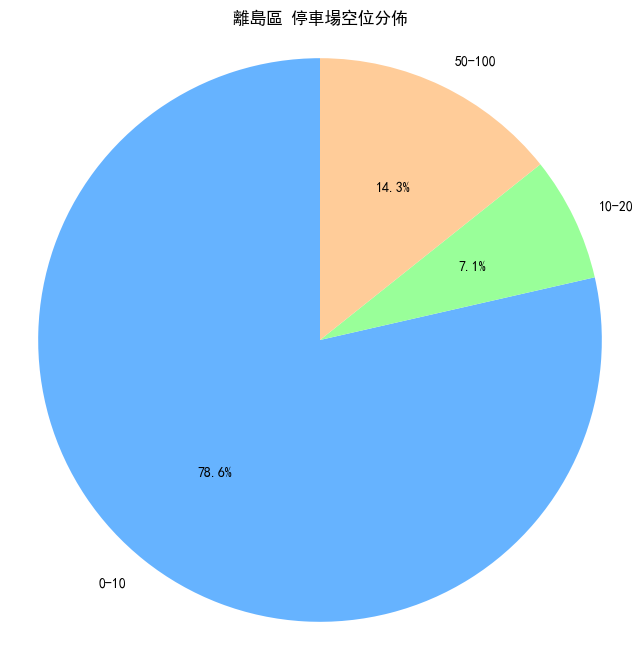

In [35]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Set SimHei as the font to display Chinese characters
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取 JSON 文件
carpark = json.load(open("carpark.json", "r", encoding="utf-8"))
vacancy = json.load(open("vacancy.json", "r", encoding="utf-8"))

# 将 vacancy 用 park_id 作为 key 构建字典
vacancy_dict = {}
for v in vacancy['car_park']:
    vacancy_dict[v['park_id']] = v

# 根据区域进行分区
districts = defaultdict(list)
vacancy_data = defaultdict(list)

# 遍历所有停车场数据
for park in carpark['car_park']:
    park_id = park['park_id']
    park_name = park['name_tc']  # 获取停车场名称
    district = park['district_tc']  # 获取停车场所在区域
    
    # 获取空位信息
    vacancy_info = vacancy_dict.get(park_id, None)
    if vacancy_info:
        available_spaces = vacancy_info['vehicle_type'][0]['service_category'][0]['vacancy']
    else:
        available_spaces = 0
    
    # 按区域进行分组
    districts[district].append(park_name)
    vacancy_data[district].append(available_spaces)

# 定义空位区间（例如：0-10，11-20，21-30）
bins = [0, 10, 20, 30, 40, 50, 100]
bin_labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

# 为每个区域绘制单独的饼图
for district in districts:
    # 统计每个区域内各个空位区间的数量
    vacancy_counts = np.histogram(vacancy_data[district], bins=bins)[0]
    
    # 过滤掉空区间，即为空的区间不在饼图中显示
    filtered_counts = [count for count in vacancy_counts if count > 0]
    filtered_labels = [bin_labels[i] for i, count in enumerate(vacancy_counts) if count > 0]

    # 如果过滤后的数据为空（即所有区间为空），跳过当前区域
    if not filtered_counts:
        print(f"No vacancy data for {district}. Skipping...")
        continue
    
    # 绘制饼图
    plt.figure(figsize=(8, 8))
    plt.pie(filtered_counts, labels=filtered_labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff6666', '#ffb3b3', '#ff6666'])
    plt.title(f'{district} 停車場空位分佈')
    plt.axis('equal')  # 保证饼图是圆形的
    
    # 显示单独的图
    plt.show()


In [37]:
vacancy_data.keys()

dict_keys(['元朗區', '荃灣區', '黃大仙區', '葵青區', '中西區', '南區', '灣仔區', '東區', '沙田區', '油尖旺區', '屯門區', '大埔區', '西貢區', '北區', '觀塘區', '九龍城區', '深水埗區', '離島區'])